In [3]:
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import seaborn as sb
from moscot.problems.time import TemporalProblem
import scvelo

In [6]:
adata = sc.read("/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/pancreas/adata_pancreas_2019.h5ad")
adata

AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'clusters_fig6_fine_final_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [7]:
map_dict = {"12.5": 12.5, "13.5": 13.5, "14.5": 14.5, "15.5": 15.5}
adata.obs["day"] = adata.obs["day"].copy().map(map_dict)

In [8]:
leave_out = [12.5, 13.5]
new_adata = adata[~adata.obs['day'].isin(leave_out)].copy()

In [9]:
tp = TemporalProblem(new_adata)
tp = tp.prepare("day")
tp = tp.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse", proliferation_key="prolif")

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  


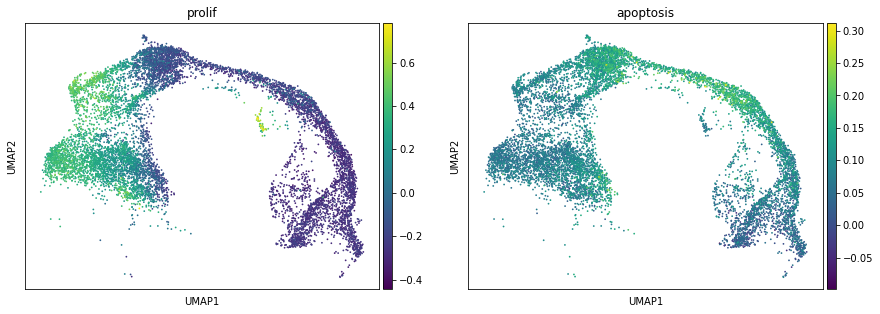

In [10]:
sc.pl.umap(new_adata[new_adata.obs["day"] == 14.5], color=['prolif', "apoptosis"])

In [11]:
new_adata.obs["growth_rate"] = np.exp(new_adata.obs["prolif"] - new_adata.obs["apoptosis"])
new_adata.obs["scaled_growth_rate"] = np.exp(2 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))
new_adata.obs["scaled3_growth_rate"] = np.exp(3 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))
new_adata.obs["scaled4_growth_rate"] = np.exp(4 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))

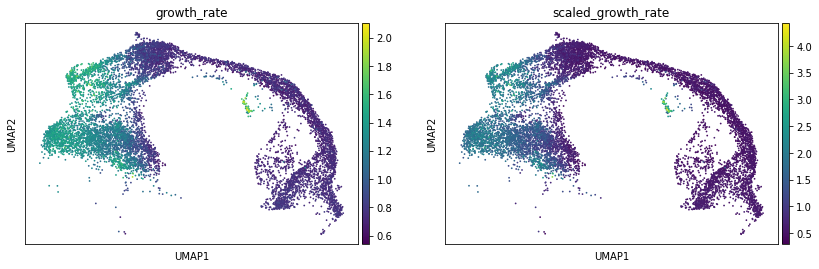

In [12]:
sc.pl.umap(new_adata[new_adata.obs["day"] == 14.5], color=["growth_rate", "scaled_growth_rate"])

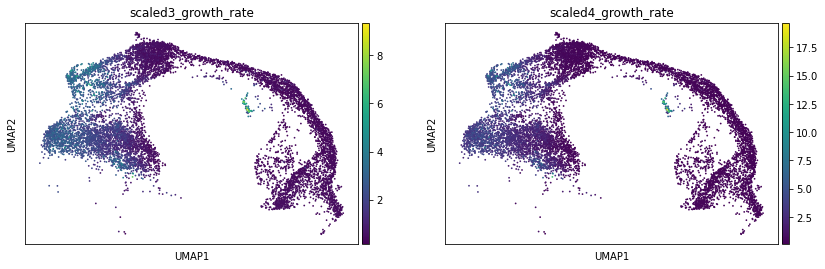

In [13]:
sc.pl.umap(new_adata[new_adata.obs["day"] == 14.5], color=["scaled3_growth_rate", "scaled4_growth_rate"])

In [14]:
sc.pp.pca(new_adata)

In [15]:
new_adata.X = new_adata.X.copy().toarray()

In [16]:
print(new_adata.X.shape)
print(type(new_adata.X))
print(np.max(new_adata.X))
print(np.min(new_adata.X))
print(np.std(new_adata.X))
print(np.mean(new_adata.X))
print(np.median(new_adata.X))

(20519, 16206)
<class 'numpy.ndarray'>
24.46001
0.0
0.61493975
0.25333145
0.0


In [17]:
#Perform a clustering for scran normalization in clusters
sc.pp.highly_variable_genes(new_adata, n_top_genes=2000,)

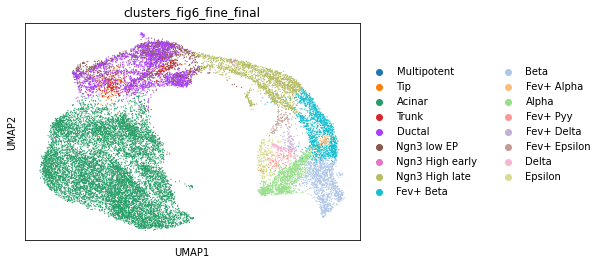

In [18]:
sc.pl.umap(new_adata, color=['clusters_fig6_fine_final'])

In [19]:
days = [14.5, 15.5]

In [20]:
for day in days:
    episode_adata = new_adata[new_adata.obs["day"] == day].copy()
    episode_adata.write(f"/lustre/groups/ml01/workspace/monge_velo/data/benchmarks/pancreas/day_{day}_growth_rate.h5ad")

In [21]:
for cell_type in new_adata.obs['clusters_fig6_fine_final'].unique():
    test_adata = new_adata[new_adata.obs['clusters_fig6_fine_final'] == cell_type].copy()
    print(cell_type, test_adata.shape)
    for day in days:
        print(test_adata[test_adata.obs["day"] == day].shape)

Beta (1177, 16206)
(586, 16206)
(591, 16206)
Acinar (10391, 16206)
(3261, 16206)
(7130, 16206)
Fev+ Beta (1338, 16206)
(881, 16206)
(457, 16206)
Trunk (322, 16206)
(269, 16206)
(53, 16206)
Ngn3 High late (1693, 16206)
(1051, 16206)
(642, 16206)
Ductal (2433, 16206)
(1517, 16206)
(916, 16206)
Tip (161, 16206)
(155, 16206)
(6, 16206)
Ngn3 low EP (1104, 16206)
(842, 16206)
(262, 16206)
Fev+ Alpha (109, 16206)
(103, 16206)
(6, 16206)
Epsilon (223, 16206)
(81, 16206)
(142, 16206)
Delta (102, 16206)
(32, 16206)
(70, 16206)
Alpha (1119, 16206)
(638, 16206)
(481, 16206)
Fev+ Delta (99, 16206)
(48, 16206)
(51, 16206)
Fev+ Epsilon (96, 16206)
(50, 16206)
(46, 16206)
Fev+ Pyy (116, 16206)
(84, 16206)
(32, 16206)
Ngn3 High early (21, 16206)
(21, 16206)
(0, 16206)
Multipotent (15, 16206)
(14, 16206)
(1, 16206)
